In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
import geopandas as gpd
import xarray as xr
import wget
import requests
import netCDF4 as nc4
from multiprocessing.pool import ThreadPool
import requests

In [15]:
#read the subset txt
urls = pd.read_csv("D:\\GU\\IC\\Veranico\\daily_datasets\\gpcp.txt", sep=" ", header=None)
# transform to string
urls = urls.astype(str).rename(columns={0:"url"})
#exclude first 2 lines
urls = urls[2:]
#folder_path = r"E:\Veranico_HD\raw_datasets\imerg"
folder_path = r"daily_datasets\gpcp"
##urls to dataframe
urls['files_names'] = [url.split("_")[-2]+'.nc4' for url in urls.url]
#list of all files inside folder_path
files = os.listdir(folder_path)
#exclude from urls the files that are already downloaded
urls = urls[~urls.files_names.isin(files)]
urls

,url,files_names


In [2]:
#read the subset txt
urls = pd.read_csv("D:\\GU\\IC\\Veranico\\daily_datasets\\imerg.txt", sep=" ", header=None)
# transform to string
urls = urls.astype(str).rename(columns={0:"url"})
#exclude first 2 lines
#urls = urls[1645:]
folder_path = r"E:\Veranico_HD\raw_datasets\imerg"
##urls to dataframe
urls['files_names'] = [url.split(".")[-4]+'.nc4' for url in urls.url]
urls = urls[2:]
#list of all files inside folder_path
files = os.listdir(folder_path)
#exclude from urls the files that are already downloaded
urls = urls[~urls.files_names.isin(files)]


In [4]:
#list of all files inside folder_path
files = os.listdir(folder_path)
#exclude from urls the files that are already downloaded
urls = urls[~urls.files_names.isin(files)]

MAX_THREADS = 100  # <--- tweak this

urls_list = urls.url.values

def download(url):
    r = requests.get(url)
    FILENAME = os.path.join(folder_path, url.split(".")[-4]+'.nc4')
    try:
        r.raise_for_status()
        f = open(FILENAME,'wb')
        f.write(r.content)
        f.close()
        print("Downloaded " + url.split(".")[-4].split("-")[0])

    except:
        print('requests.get() returned an error code '+str(r.status_code))

if __name__ == "__main__":
    with ThreadPool(MAX_THREADS) as p:
        p.map(download, urls_list)

requests.get() returned an error code 503
requests.get() returned an error code 503
requests.get() returned an error code 503
requests.get() returned an error code 503
requests.get() returned an error code 503
requests.get() returned an error code 503
requests.get() returned an error code 503
requests.get() returned an error code 503
requests.get() returned an error code 503
requests.get() returned an error code 503
requests.get() returned an error code 503
requests.get() returned an error code 503
requests.get() returned an error code 503
requests.get() returned an error code 503
requests.get() returned an error code 503
requests.get() returned an error code 503
requests.get() returned an error code 503
requests.get() returned an error code 503
requests.get() returned an error code 503
requests.get() returned an error code 503
requests.get() returned an error code 503
requests.get() returned an error code 503
requests.get() returned an error code 503
requests.get() returned an error c

In [9]:
files = os.listdir(folder_path)
#exclude from urls the files that are already downloaded
urls = urls[~urls.files_names.isin(files)]
for url in urls.url.values:
    # Set the FILENAME string to the data file name, the LABEL keyword value, or any customized name. 
    FILENAME = os.path.join(folder_path, url.split(".")[-4]+'.nc4')
    result = requests.get(url)
    try:
        result.raise_for_status()
        f = open(FILENAME,'wb')
        f.write(result.content)
        f.close()
        print('contents of URL written to '+FILENAME)
    except:
        print('requests.get() returned an error code '+str(result.status_code))

contents of URL written to daily_datasets\imerg_raw\20021224-S000000-E235959.nc4
contents of URL written to daily_datasets\imerg_raw\20021225-S000000-E235959.nc4
contents of URL written to daily_datasets\imerg_raw\20021226-S000000-E235959.nc4
contents of URL written to daily_datasets\imerg_raw\20050702-S000000-E235959.nc4
contents of URL written to daily_datasets\imerg_raw\20050711-S000000-E235959.nc4
contents of URL written to daily_datasets\imerg_raw\20050715-S000000-E235959.nc4
contents of URL written to daily_datasets\imerg_raw\20050716-S000000-E235959.nc4
contents of URL written to daily_datasets\imerg_raw\20050717-S000000-E235959.nc4
contents of URL written to daily_datasets\imerg_raw\20050718-S000000-E235959.nc4
contents of URL written to daily_datasets\imerg_raw\20050719-S000000-E235959.nc4
contents of URL written to daily_datasets\imerg_raw\20050720-S000000-E235959.nc4
contents of URL written to daily_datasets\imerg_raw\20050721-S000000-E235959.nc4
contents of URL written to d

# clean

In [3]:
lat_min = -25
lat_max = -2
lon_min = -61
lon_max = -42
date_start= '1981-01-01'
date_end = '2020-12-31'
dataset = 'imerg'
# Specify the path to the folder containing the NetCDF files
folder_path = r"E:\Veranico_HD\raw_datasets\\" + dataset
# Open and concatenate all the NetCDF files
ds = xr.open_mfdataset(os.path.join(folder_path, '*.nc4'),combine='nested', concat_dim='time')


In [7]:
ds = ds.rename({ 'precipitation': 'pr'})
ds = ds.sortby(ds.lat)
ds = ds.assign_coords(lon=(((ds.lon + 180) % 360) - 180)).sortby('lon')
ds = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max), time=slice(date_start, date_end))
#ds['pr'] = ds['pr']  * 30 * 24
ds = ds.transpose('time', 'lat', 'lon')
ds = ds.chunk({'time': -1, 'lat': 40, 'lon': 20})


,Array,Chunk
Bytes,1.19 GiB,5.57 MiB
Shape,"(7305, 230, 190)","(7305, 20, 10)"
Count,43705 Tasks,247 Chunks
Type,float32,numpy.ndarray


In [10]:
ds.to_netcdf(r'E:\Veranico_HD\clean_cerrado\\' + dataset + '.nc')


In [11]:
# CDD

from funcs import *
ds = xr.open_dataset(r'E:\Veranico_HD\clean_cerrado\\' + dataset + '.nc')
cdd = cdd_numba(ds.pr)
cdd.to_netcdf(r"D:\GU\IC\Veranico\daily_datasets\CDD\\" + dataset + '.nc')

d:\GU\IC\Veranico\funcs.py:25: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  daa = xr.apply_ufunc(


In [12]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [13]:
regions = gpd.read_file(r"D:\GU\IC\Scripts\Data\regions1.geojson")
mm = cdd.where(cdd > 5).mean(dim='time')


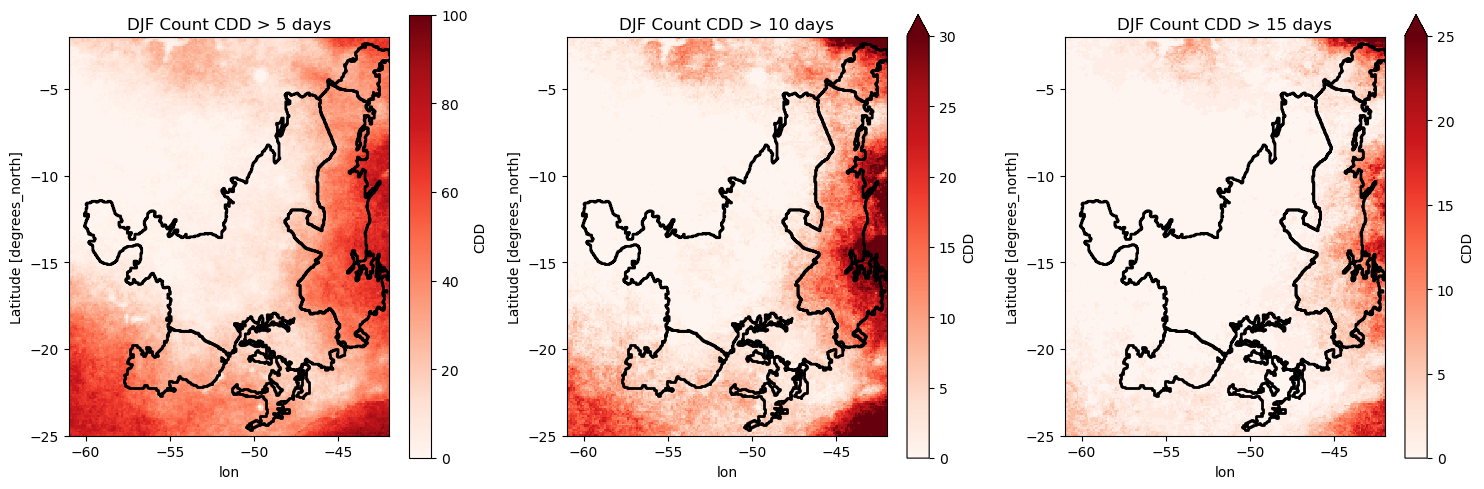

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
cdd.sel(time=cdd['time.season'] == 'DJF').where(cdd > 5).count(dim='time').plot(ax=axs[0],  cmap='Reds', vmax=100)
cdd.sel(time=cdd['time.season'] == 'DJF').where(cdd > 10).count(dim='time').plot(ax=axs[1], cmap='Reds', vmax=30)
cdd.sel(time=cdd['time.season'] == 'DJF').where(cdd > 15).count(dim='time').plot(ax=axs[2], cmap='Reds', vmax=25)
for i in range(3):
    axs[i].set_title('DJF Count CDD > ' + str([5, 10, 15][i]) + ' days')
    regions.plot(ax=axs[i], color='none', edgecolor='black', linewidth=2)

plt.tight_layout()